In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\pc\Downloads\facebook_ads_data (2.0).csv')
df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [2]:
daily_stats = df.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stats

,total_spend,total_impressions,total_clicks,total_value
ad_date,,,,
2020-11-11,1.89,1800,45,2.38
2020-11-12,23.00,10473,397,21.13
2020-11-13,6.36,11669,451,9.77
2020-11-14,7.27,5005,392,12.67
2020-11-15,6.98,12465,657,10.96
...,...,...,...,...
2022-10-29,714.03,33358,115,680.34
2022-10-30,335.91,27562,69,472.61
2022-10-31,227.45,6054,58,191.87


In [3]:
daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']
daily_stats = daily_stats.reset_index()
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            547 non-null    object 
 1   total_spend        547 non-null    float64
 2   total_impressions  547 non-null    int64  
 3   total_clicks       547 non-null    int64  
 4   total_value        547 non-null    float64
 5   romi               538 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 25.8+ KB


In [5]:
daily_stats_2021 = daily_stats[(daily_stats['ad_date'] >= '2021-01-01') & (daily_stats['ad_date'] <= '2021-12-31')]

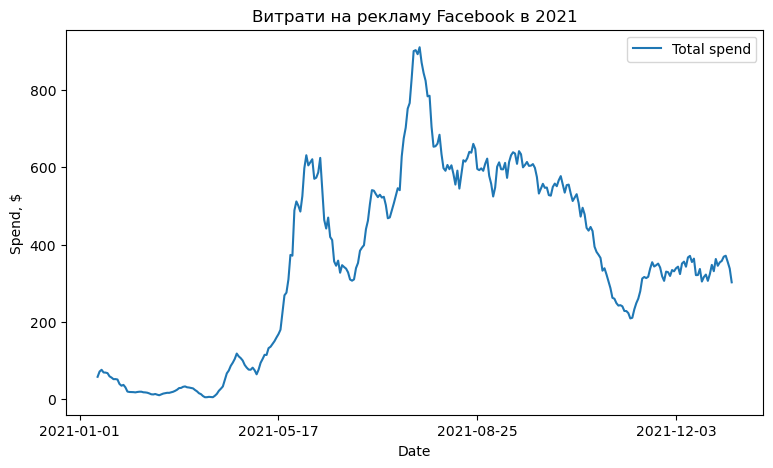

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5), dpi=100)

plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['total_spend'].rolling(10).mean(), label='Total spend')

plt.legend()

plt.title('Витрати на рекламу Facebook в 2021')

plt.xlabel('Date')
plt.ylabel('Spend, $')

plt.xticks(list(daily_stats_2021['ad_date'])[::100])

plt.show()

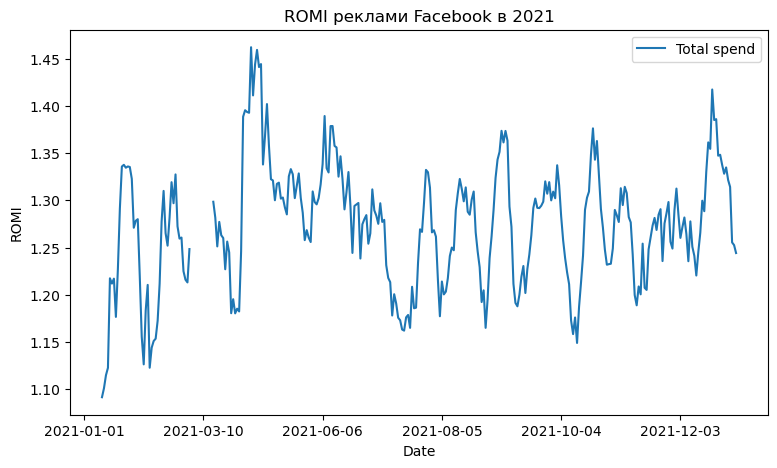

In [11]:
plt.figure(figsize=(9,5), dpi=100)

plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['romi'].rolling(10).mean(), label='Total spend')

plt.legend()

plt.title('ROMI реклами Facebook в 2021')

plt.xlabel('Date')
plt.ylabel('ROMI')

plt.xticks(list(daily_stats_2021['ad_date'])[::60])

plt.show()

In [12]:
campaign_stats = df.groupby('campaign_name')[['total_spend', 'total_value']].sum()
campaign_stats

,total_spend,total_value
campaign_name,,
Brand,539.92,670.15
Crazy discounts,2175.29,2583.59
Discounts,2856.39,3516.27
Electronics,23920.42,29169.38
Expansion,67212.82,83288.66
Hobbies,11326.97,13974.63
Lookalike,63631.09,80234.70
New items,2936.97,3742.05
Promos,4993.84,8793.77


In [13]:
campaign_stats['romi'] = campaign_stats['total_value'] / campaign_stats['total_spend']
campaign_stats = campaign_stats.reset_index()
campaign_stats

,campaign_name,total_spend,total_value,romi
0,Brand,539.92,670.15,1.241202
1,Crazy discounts,2175.29,2583.59,1.187699
2,Discounts,2856.39,3516.27,1.231019
3,Electronics,23920.42,29169.38,1.219434
4,Expansion,67212.82,83288.66,1.239178
5,Hobbies,11326.97,13974.63,1.233748
6,Lookalike,63631.09,80234.70,1.260935
7,New items,2936.97,3742.05,1.274119
8,Promos,4993.84,8793.77,1.760923
9,Trendy,1992.31,3798.90,1.906782


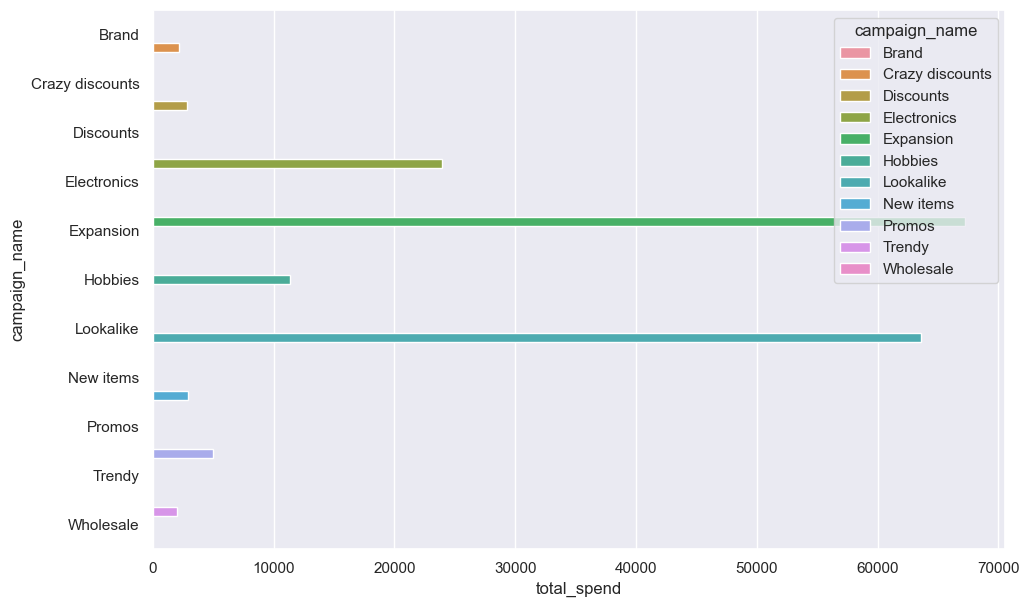

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(11, 7), dpi=100)  

sns.set_theme()

sns.barplot(x='total_spend', y='campaign_name', data=campaign_stats, hue='campaign_name', width=2)

plt.show() 

<Axes: xlabel='romi', ylabel='campaign_name'>

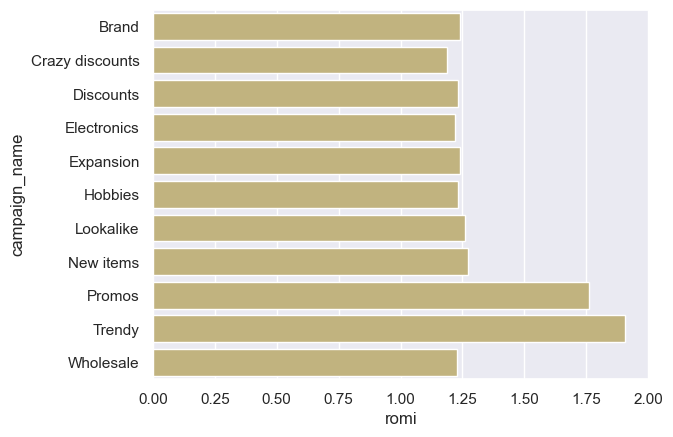

In [33]:
sns.barplot(x='romi', y='campaign_name', data=campaign_stats, color="y")

<Axes: xlabel='campaign_name', ylabel='romi'>

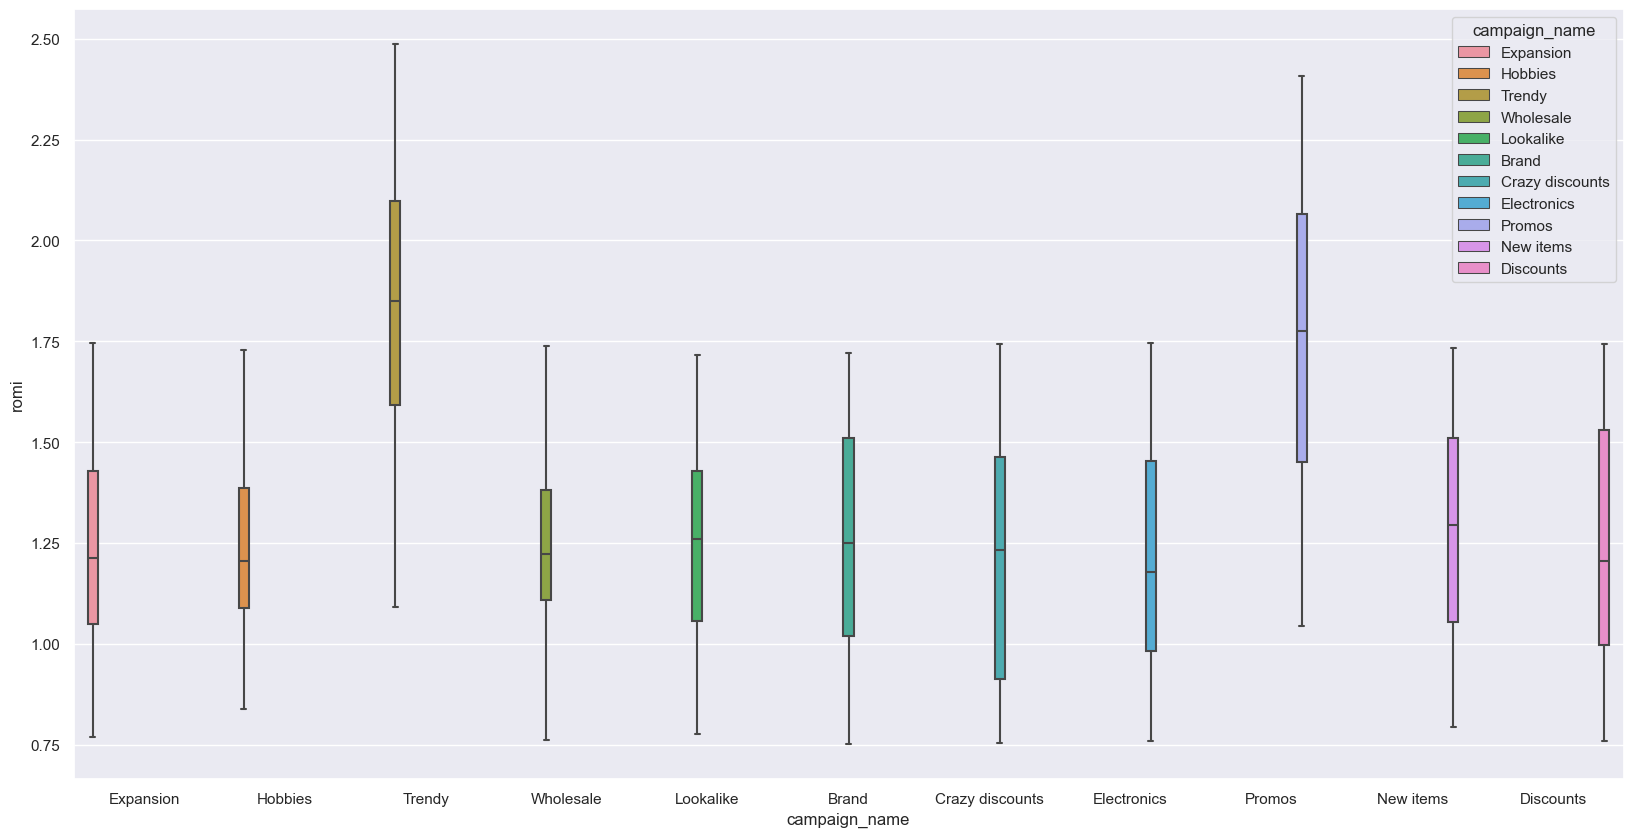

In [50]:
plt.figure(figsize=(20,10), dpi=100)

sns.boxplot(x="campaign_name", y="romi", data=df, hue = "campaign_name")

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


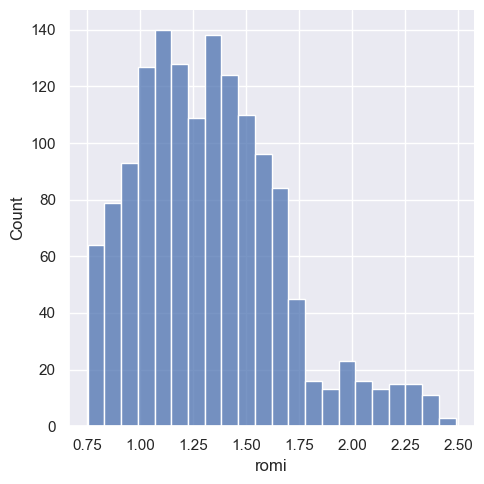

In [51]:
sns.displot(data=df, x="romi")

<Axes: >

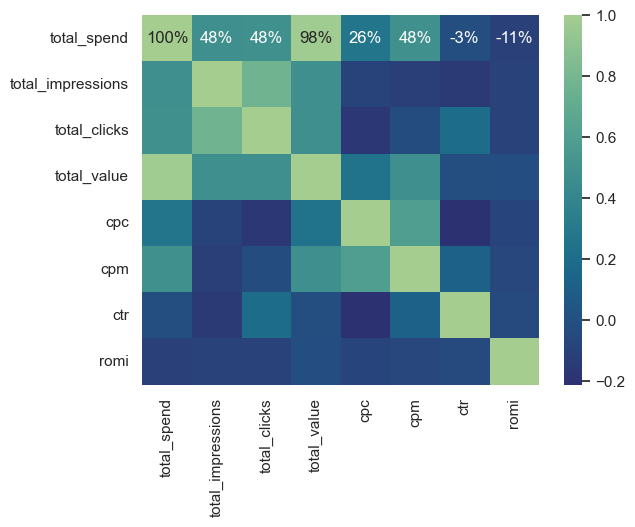

In [60]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.0%', cmap= 'crest_r')

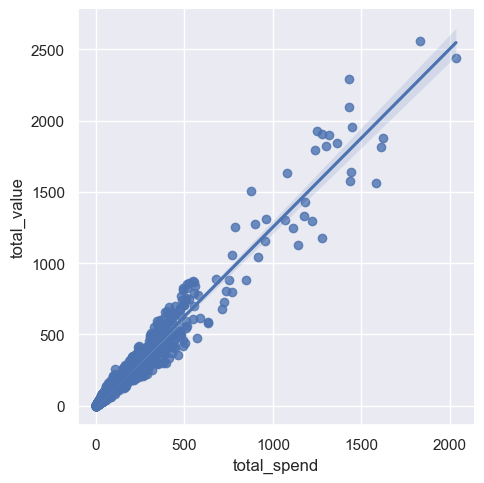

In [61]:
sns.lmplot(data=df, x="total_spend", y="total_value")